In [1]:
import numpy as np # - Procesamiento de imágenes (cv2, numpy)
import pandas as pd # - Manipulación de datos (pandas)
import os
import cv2
from sklearn import metrics  #- Métricas de evaluación (sklearn)
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt # - Visualización de resultados (matplotlib, seaborn)
import seaborn as sns
from tensorflow.keras.utils import to_categorical # - Construcción y entrenamiento de modelos de deep learning (keras)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split # - División de datos en entrenamiento y prueba (sklearn)

2025-06-08 04:11:24.142319: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-08 04:11:24.153891: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-08 04:11:24.167855: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-08 04:11:24.172719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-08 04:11:24.183971: I tensorflow/core/platform/cpu_feature_guar

## **Procesamiento de las Imagenes**

In [2]:
path = "Desktop/MNA/Navegacion/Tarea - CNN/archive"
data_dir1= path + "/Train"
img_size=32
clases=43
señales=[]
labels=[]

In [3]:
def cargar_datos(data_dir,clases=43,img_size=32):
      for classfolder in range(clases):
          path = os.path.join(data_dir,str(classfolder)) # Construye la ruta de la clase
          imagenes = os.listdir(path) # Lista todas las imágenes en la carpeta de la clase

          for imagen in imagenes:
                  imagenpath = os.path.join(path,imagen) # Ruta completa de la imagen
                  image = cv2.imread(imagenpath)# Lee la imagen desde disco 
                  image = cv2.resize(image,(img_size,img_size))  # Redimensiona la imagen
                  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convierte la imagen a RGB
                  image = np.array(image)  # Convierte la imagen a un arreglo numpy
                  señales.append(image)  # Agrega la imagen procesada a la lista de señales
                  labels.append(classfolder)# Agrega la etiqueta correspondiente
      return np.array(señales),np.array(labels) # Devuelve los arreglos de imágenes y etiquetas

In [4]:
señales1, labels1 = cargar_datos(path+"/Train")# Carga las imágenes y etiquetas de entrenamiento usando la función definida.
# 'señales1' contendrá los arreglos de imágenes procesadas y 'labels1' las etiquetas correspondientes.

## **Separacion de datos de entrenamiento y prueba**

In [5]:
# Muestra la cantidad de imágenes y etiquetas cargadas para verificar la correcta lectura de datos
print("imagenes: ",señales1.shape)
print("labels: ", labels1.shape)
# Convierte las etiquetas a formato one-hot para clasificación multiclase
y=to_categorical(labels1,clases)
# Divide el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(señales1, y, test_size=0.2, random_state=42)
# Imprime las dimensiones de los conjuntos resultantes para confirmar la separación
print("Xtrain: ",X_train.shape)
print("Xtest: ",X_test.shape)
print("ytrain: ",y_train.shape)
print("ytest: ",y_test.shape)


imagenes:  (39209, 32, 32, 3)
labels:  (39209,)
Xtrain:  (31367, 32, 32, 3)
Xtest:  (7842, 32, 32, 3)
ytrain:  (31367, 43)
ytest:  (7842, 43)


## **Creación del modelo**

In [6]:
# Definición del modelo de red neuronal convolucional (CNN) para clasificación de señales de tráfico
modelo=Sequential([
    # Primera capa convolucional con 64 filtros, tamaño de kernel 3x3 y función de activación ReLU
    Conv2D(64,(3,3),activation="relu",input_shape=(32,32,3)),
    # Capa de max pooling para reducir la dimensionalidad
    MaxPooling2D((2,2)),
    # Segunda capa convolucional con 128 filtros y función de activación ReLU
    Conv2D(128,(3,3),activation="relu"),
    # Capa de max pooling para reducir la dimensionalidad
    Dropout(0.2),
    # Tercera capa convolucional con 256 filtros y función de activación ReLU
    Conv2D(256,(3,3),activation="relu"),
    # Capa de max pooling para reducir la dimensionalidad
    MaxPooling2D((2,2)),
    # Aplanamiento de la salida para conectarla a la capa densa
    Flatten(),
     # Capa densa totalmente conectada con 512 neuronas y activación ReLU
    Dense(512,activation="relu"),
     # Dropout adicional para regularización (50%)
    Dropout(0.5),
     # Capa de salida con 43 neuronas (una por cada clase) y activación softmax para clasificación multiclase
    Dense(43,activation="softmax")
                 ])
# Compilación del modelo especificando el optimizador, la función de pérdida y la métrica de evaluación
modelo.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
# Muestra un resumen de la arquitectura del modelo
modelo.summary()

/home/raven/miniconda3/envs/nav3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1749377662.694746   13846 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1749377662.794673   13846 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1749377662.794746   13846 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1749377662.797312   13846 c

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,670,187 (14.00 MB)

 Trainable params: 3,670,187 (14.00 MB)

 Non-trainable params: 0 (0.00 B)

## **Entrenamiento y prueba**

### Entrenamiento del modelo

In [7]:
# Entrenamiento del modelo de red neuronal convolucional (CNN) usando los datos de entrenamiento.
# - X_train: imágenes de entrenamiento
# - y_train: etiquetas en formato one-hot
# - epochs=20: número de épocas de entrenamiento
# - batch_size=256: tamaño del lote para cada iteración
# - validation_split=0.1: el 10% de los datos de entrenamiento se usan para validación
# El historial de entrenamiento (precisión y pérdida por época) se guarda en la variable 'historial'.
historial=modelo.fit(X_train,y_train,epochs=20, batch_size=256,validation_split=0.1)

Epoch 1/20


I0000 00:00:1749377676.769727   14392 service.cc:146] XLA service 0x75bb3001d920 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749377676.769767   14392 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2025-06-08 04:14:36.790616: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-06-08 04:14:36.906345: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90201
2025-06-08 04:14:37.370759: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1192', 288 bytes spill stores, 288 bytes spill loads



  6/111 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.0336 - loss: 46.7058

I0000 00:00:1749377680.295378   14392 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


107/111 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2410 - loss: 9.9749 

2025-06-08 04:14:49.127495: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1192', 48 bytes spill stores, 48 bytes spill loads



111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2491 - loss: 9.7474

2025-06-08 04:14:44.634870: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_103', 16 bytes spill stores, 16 bytes spill loads

2025-06-08 04:14:46.287934: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_103', 128 bytes spill stores, 128 bytes spill loads



111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.2510 - loss: 9.6929 - val_accuracy: 0.8903 - val_loss: 0.4756
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8517 - loss: 0.5367 - val_accuracy: 0.9735 - val_loss: 0.1256
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9409 - loss: 0.2246 - val_accuracy: 0.9837 - val_loss: 0.0728
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9637 - loss: 0.1307 - val_accuracy: 0.9853 - val_loss: 0.0566
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9723 - loss: 0.0946 - val_accuracy: 0.9933 - val_loss: 0.0304
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9793 - loss: 0.0822 - val_accuracy: 0.9943 - val_loss: 0.0266
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9857 - loss: 0.0553 - val_accuracy: 0.9959 - val_loss: 0.0191
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9838 - loss: 0.0573 - val_accuracy: 0.9968

### Evaluando el modelo con la data de prueba

In [8]:
# Evalúa el modelo entrenado utilizando el conjunto de prueba (X_test, y_test)
# 'loss' es el valor de la función de pérdida y 'accuracy' es la precisión obtenida en los datos de prueba.
loss,accuracy=modelo.evaluate(X_test,y_test)
# Imprime en consola el valor de la pérdida y la precisión del modelo sobre el conjunto de prueba.
print("loss: ",loss)
print("accuracy: ",accuracy)

2025-06-08 04:15:08.046344: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_103', 16 bytes spill stores, 16 bytes spill loads



234/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9964 - loss: 0.0207

2025-06-08 04:15:09.600775: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_103', 232 bytes spill stores, 232 bytes spill loads



246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9964 - loss: 0.0208
loss:  0.02249419130384922
accuracy:  0.9965569972991943


### Graficas de precisión y pérdia

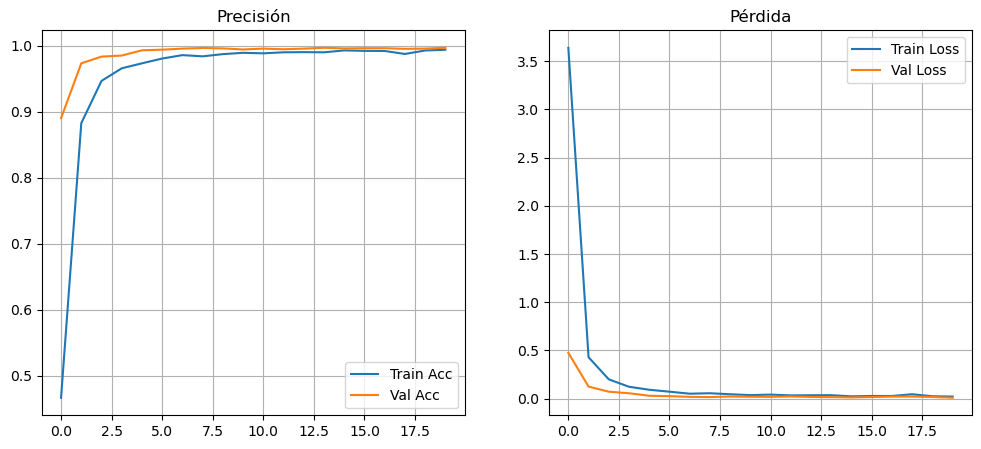

In [9]:
# Imprime en consola el valor de la pérdida y la precisión del modelo sobre el conjunto de prueba.
plt.figure(figsize=(12, 5)) # Crea una figura de tamaño 12x5
plt.subplot(1, 2, 1)# Gráfica de precisión (accuracy)
plt.plot(historial.history['accuracy'], label='Train Acc')   # Precisión en entrenamiento
plt.plot(historial.history['val_accuracy'], label='Val Acc') # Precisión en validación
plt.legend(); plt.title("Precisión")                         # Muestra la leyenda
plt.grid()                                                   # Título del gráfico

plt.subplot(1, 2, 2)
plt.plot(historial.history['loss'], label='Train Loss')      # Pérdida en entrenamiento
plt.plot(historial.history['val_loss'], label='Val Loss')    # Pérdida en validación
plt.legend();                                                # Muestra la leyenda
plt.title("Pérdida")                                         # Muestra el título del gráfico
plt.grid()                                                   # Muestra la cuadrícula en el gráfico
plt.show()                                                   # Muestra el gráfico de precisión y pérdida durante el entrenamiento y validación

## **Usando las imagenes de la carpeta Test para validar el modelo**

In [10]:
# Directorio donde se encuentran las imágenes de prueba
data_dir2= path
# Lee el archivo CSV que contiene las etiquetas y rutas de las imágenes de prueba
labels2=pd.read_csv(path + "/Test.csv")
# Extrae las etiquetas verdaderas y las rutas de las imágenes desde el DataFrame
y_val=labels2["ClassId"].values
imagenes2=labels2["Path"].values
señales2=[]
# Procesa cada imagen de prueba: lee, redimensiona y convierte a RGB, luego la agrega a la lista
for imagen in imagenes2:
                  imagenpath = os.path.join(data_dir2,imagen)    # Ruta completa de la imagen
                  image = cv2.imread(imagenpath)                 # Lee la imagen desde disco
                  image = cv2.resize(image,(img_size,img_size))  # Redimensiona la imagen
                  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convierte la imagen a RGB
                  image = np.array(image)                        # Convierte la imagen a un arreglo numpy
                  señales2.append(image)                         # Agrega la imagen procesada a la lista
# Convierte la lista de imágenes procesadas a un arreglo numpy
X_val=np.array(señales2)
# Imprime las dimensiones de los datos de prueba para verificar la carga correcta
print("Xval: ",X_val.shape)
print("yval: ",y_val.shape)

Xval:  (12630, 32, 32, 3)
yval:  (12630,)


In [11]:
# Realiza la predicción de las clases para las imágenes de validación
Prediccion=modelo.predict(X_val)
# Obtiene la clase predicha para cada imagen (índice del valor máximo en cada vector de predicción)
y_pred=np.argmax(Prediccion,axis=1)
# Imprime la precisión del modelo en el conjunto de validación
print(accuracy_score(y_val,y_pred))
# Imprime el reporte de clasificación (precisión, recall y f1-score por clase)
print(classification_report(y_val,y_pred))

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
0.9746634996041171
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       0.98      0.99      0.99       720
           2       0.98      0.99      0.99       750
           3       0.98      0.97      0.97       450
           4       1.00      0.97      0.98       660
           5       0.91      0.98      0.94       630
           6       1.00      0.91      0.95       150
           7       1.00      0.95      0.97       450
           8       0.95      0.99      0.97       450
           9       0.98      1.00      0.99       480
          10       1.00      0.99      0.99       660
          11       0.94      0.99      0.96       420
          12       0.99      0.98      0.99       690
          13       0.99      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.97      0.99      0.98       210
          16       1.

## **Visualizacion imagen original VS prediccion**

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


2025-06-08 04:16:09.094461: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng20{k2=2,k4=0,k5=0,k6=0,k7=0,k19=0} for conv (f32[1,256,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,128,13,13]{3,2,1,0}, f32[256,128,3,3]{3,2,1,0}, f32[256]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2025-06-08 04:16:09.095659: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 6.441592356s
Trying algorithm eng20{k2=2,k4=0,k5=0,k6=0,k7=0,k19=0} for conv (f32[1,256,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,128,13,13]{3,2,1,0}, f32[256,128,3,3]{3,2,1,0}, f32[256]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$con

Prediccion:  [35]


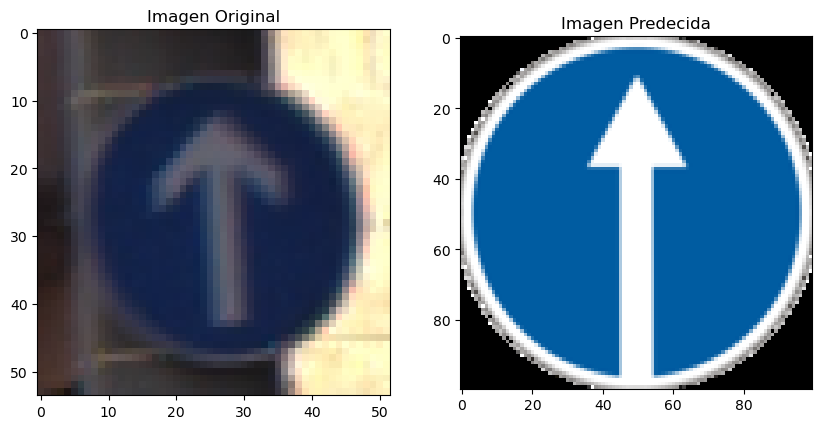

In [12]:
import random

metadata = path + "/Meta"
# Selecciona aleatoriamente una imagen de prueba de la carpeta Test
rutaimagen = os.path.join(data_dir2,random.choice(imagenes2))
imagen = cv2.imread(rutaimagen)                                # Lee la imagen original desde disco
imagen1 = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)              # Convierte la imagen a RGB para visualización
imagen2 = cv2.resize(imagen1,(img_size,img_size))              # Redimensiona la imagen al tamaño requerido por el modelo
imagen3 = np.array(imagen2)                                    # Convierte la imagen a un arreglo numpy
# Realiza la predicción de la clase para la imagen seleccionada
Pred_img=modelo.predict(imagen3.reshape(1,32,32,3))            # Ajusta la forma para el modelo (batch de 1 imagen)
Pred_img_num=np.argmax(Pred_img,axis=1)                        # Obtiene la clase predicha (índice del valor máximo)
print("Prediccion: ",Pred_img_num)
# Busca la imagen de referencia de la clase predicha en la carpeta Meta
rutametadata=os.path.join(metadata,str(Pred_img_num[0])+".png")
metadata1=cv2.imread(rutametadata)                             # Lee la imagen de referencia
metadata2=cv2.cvtColor(metadata1,cv2.COLOR_BGR2RGB)            # Convierte la imagen de referencia a RGB

# Visualiza la imagen original y la imagen de la clase predicha lado a lado
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Imagen Original")
plt.imshow(imagen1)

plt.subplot(1,2,2)
plt.title("Imagen Predecida")
plt.imshow(metadata2)
plt.show()